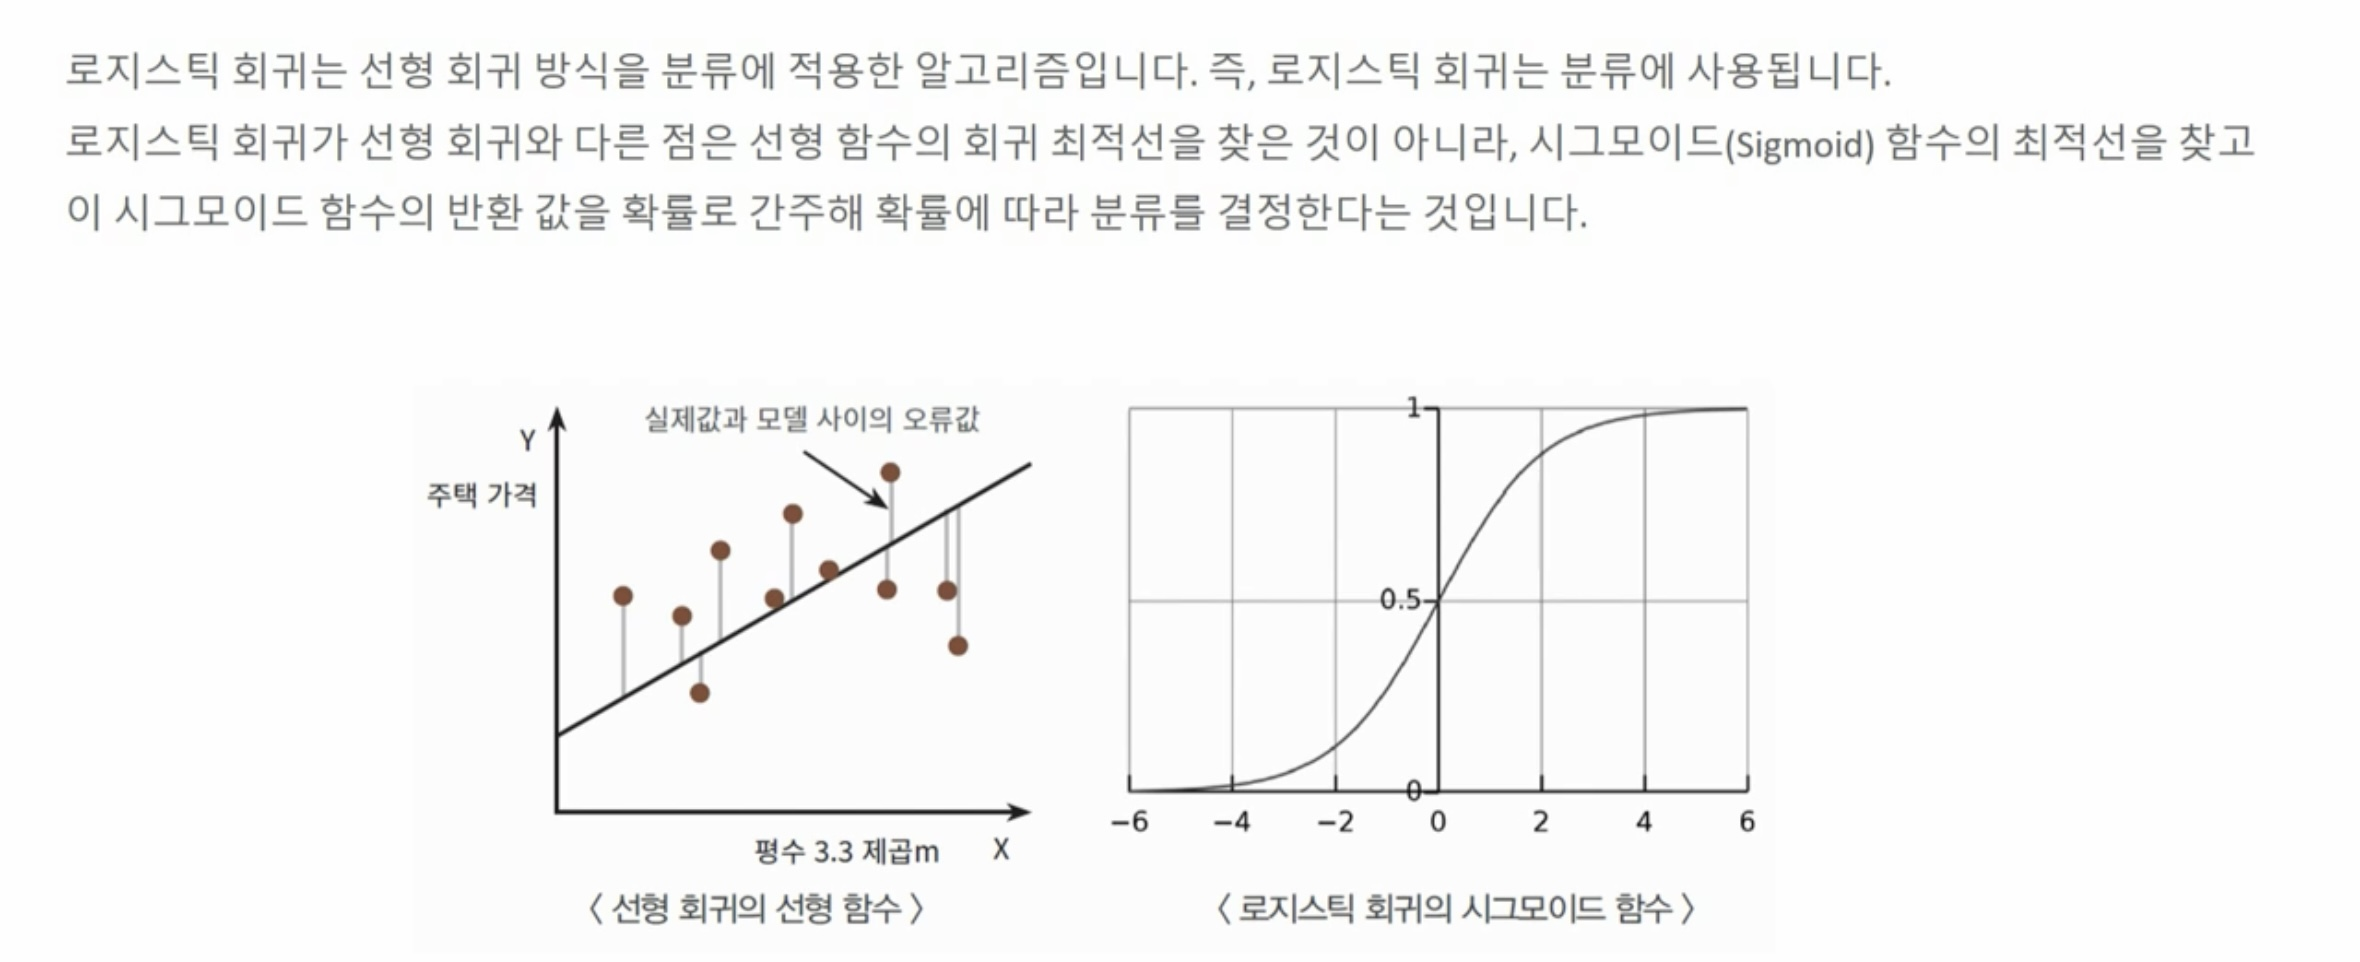

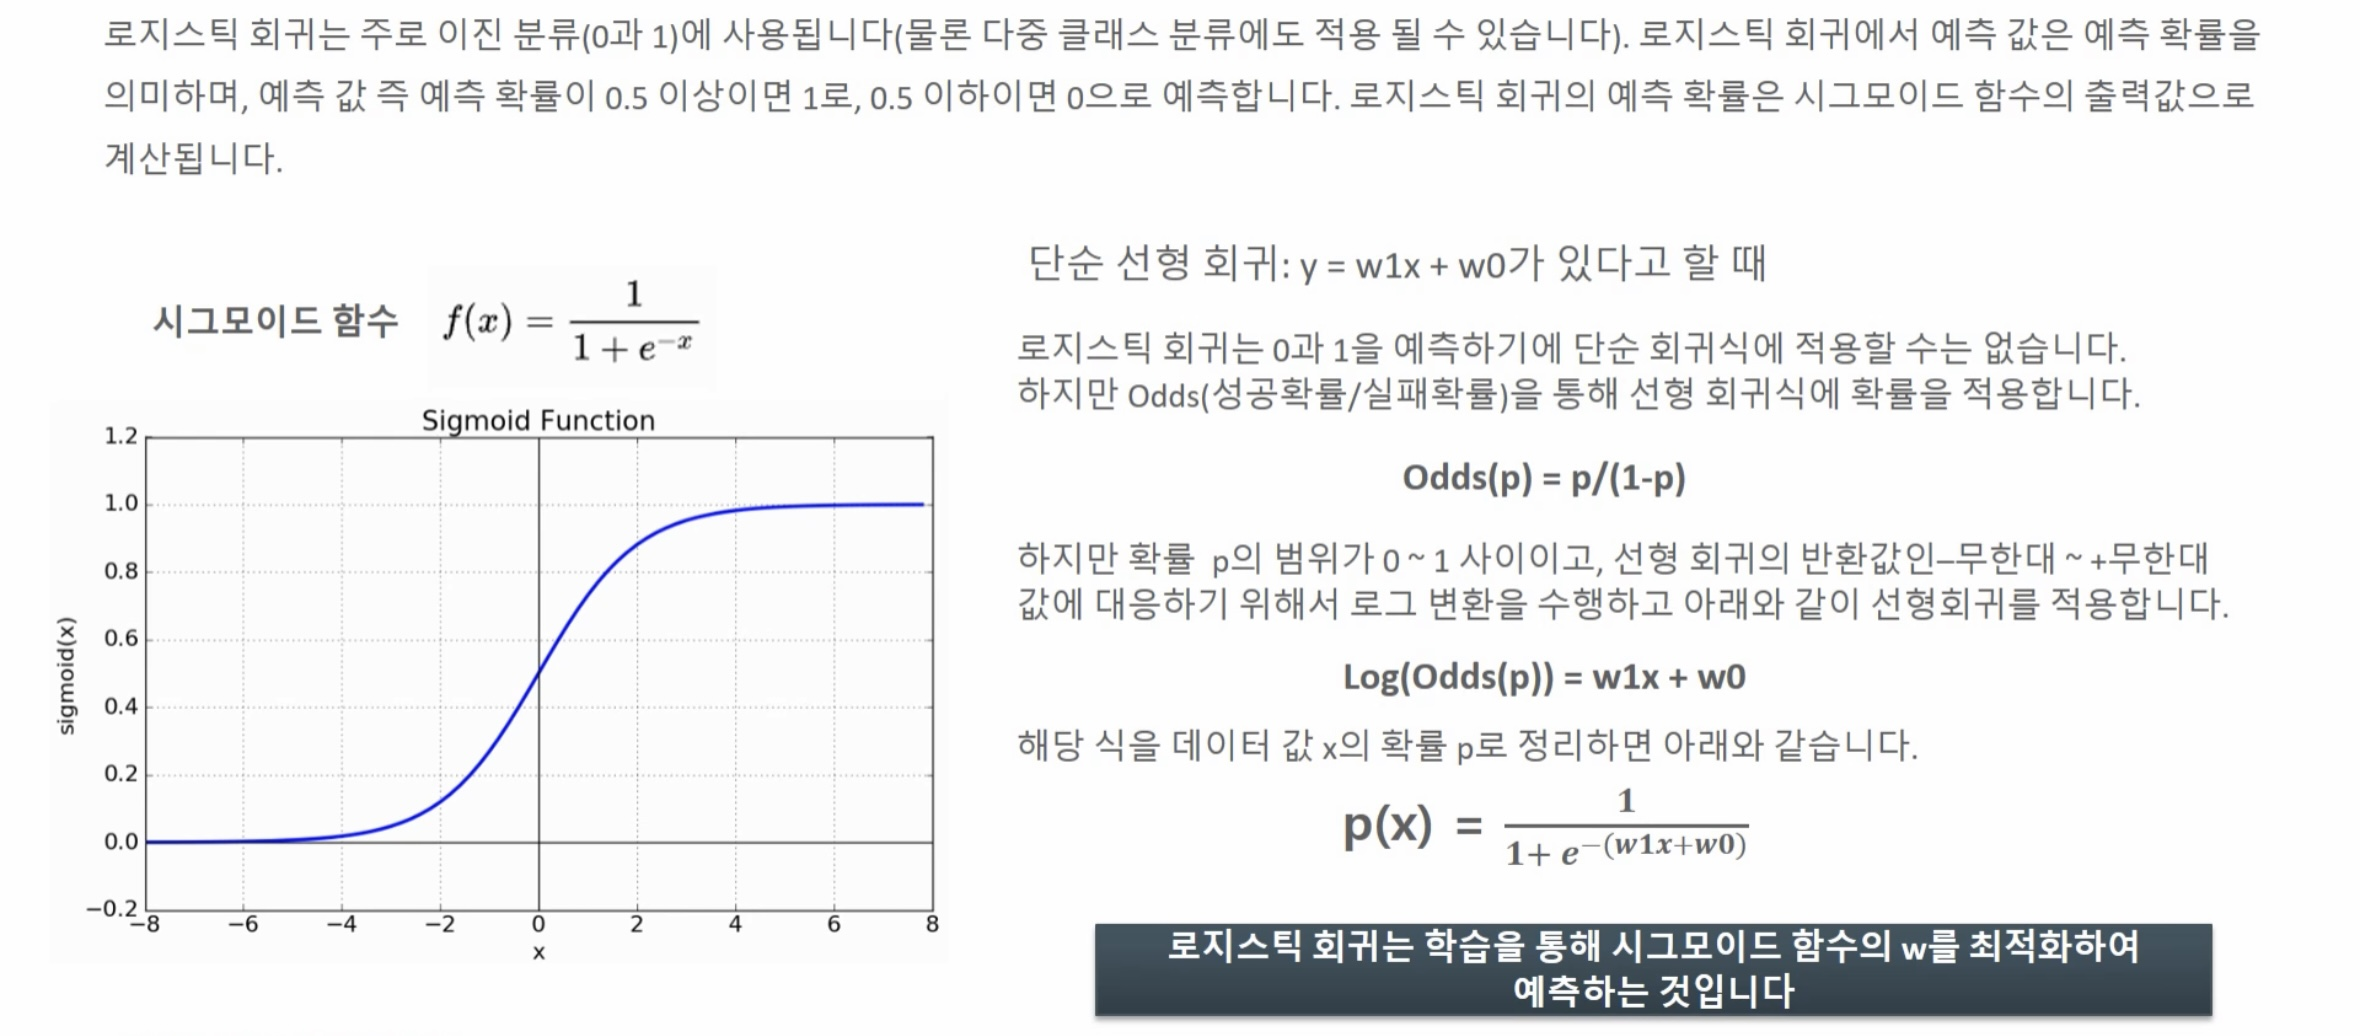

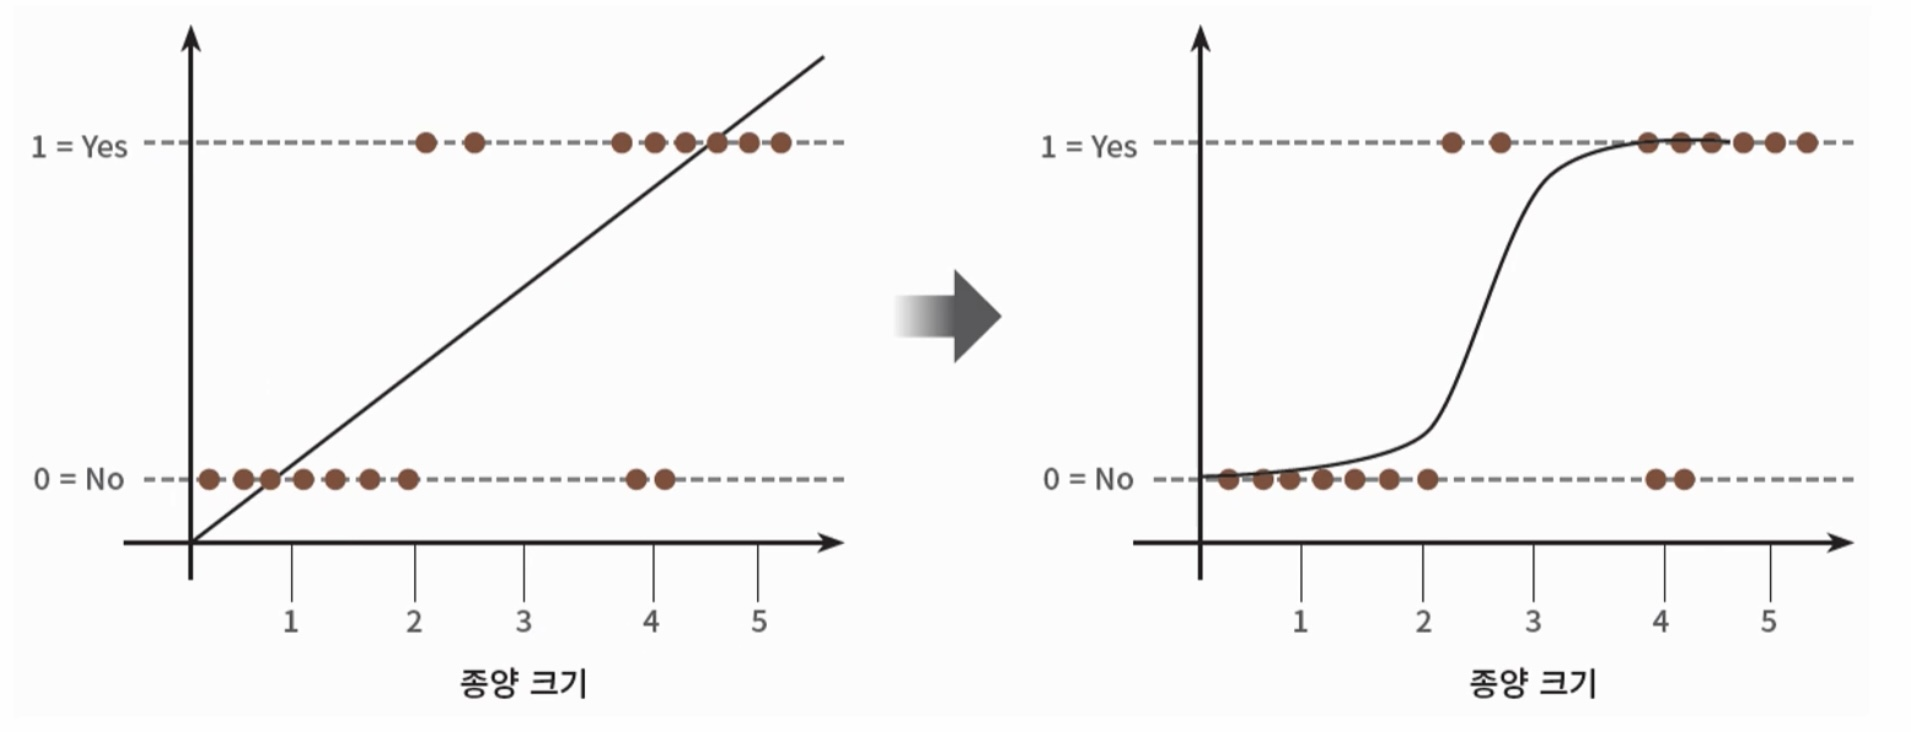

* 로지스틱 회귀는 가볍고, 빠르며, 이진 분류 예측 성능도 뛰어납니다. 특히 희소한 데이터 세트 분류에서 성능이 좋아서 텍스트 분류에 자주 사용됩니다.

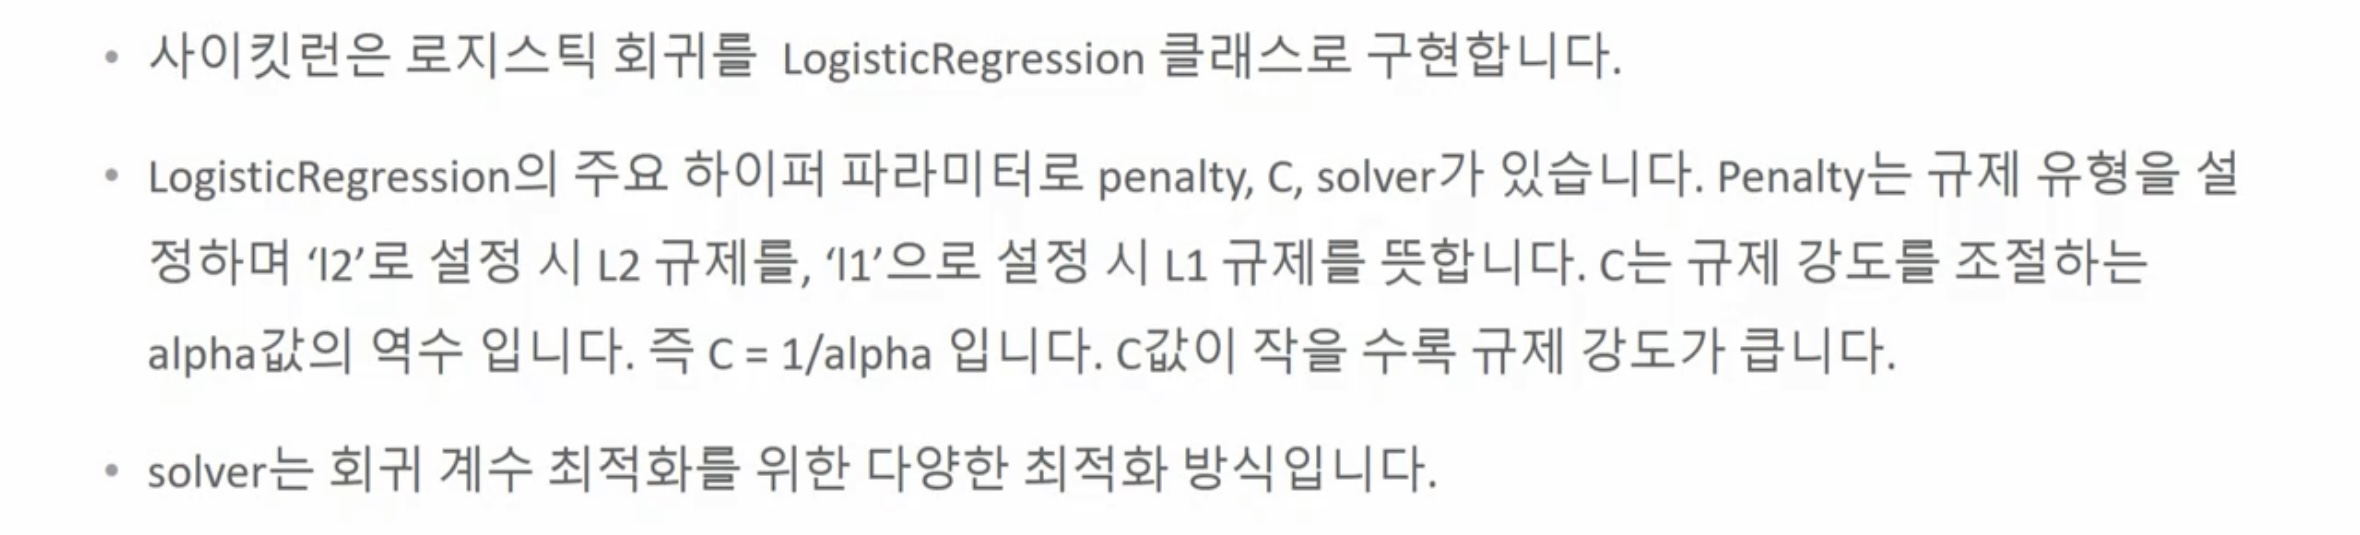

## Logistic Regression의 solver 유형
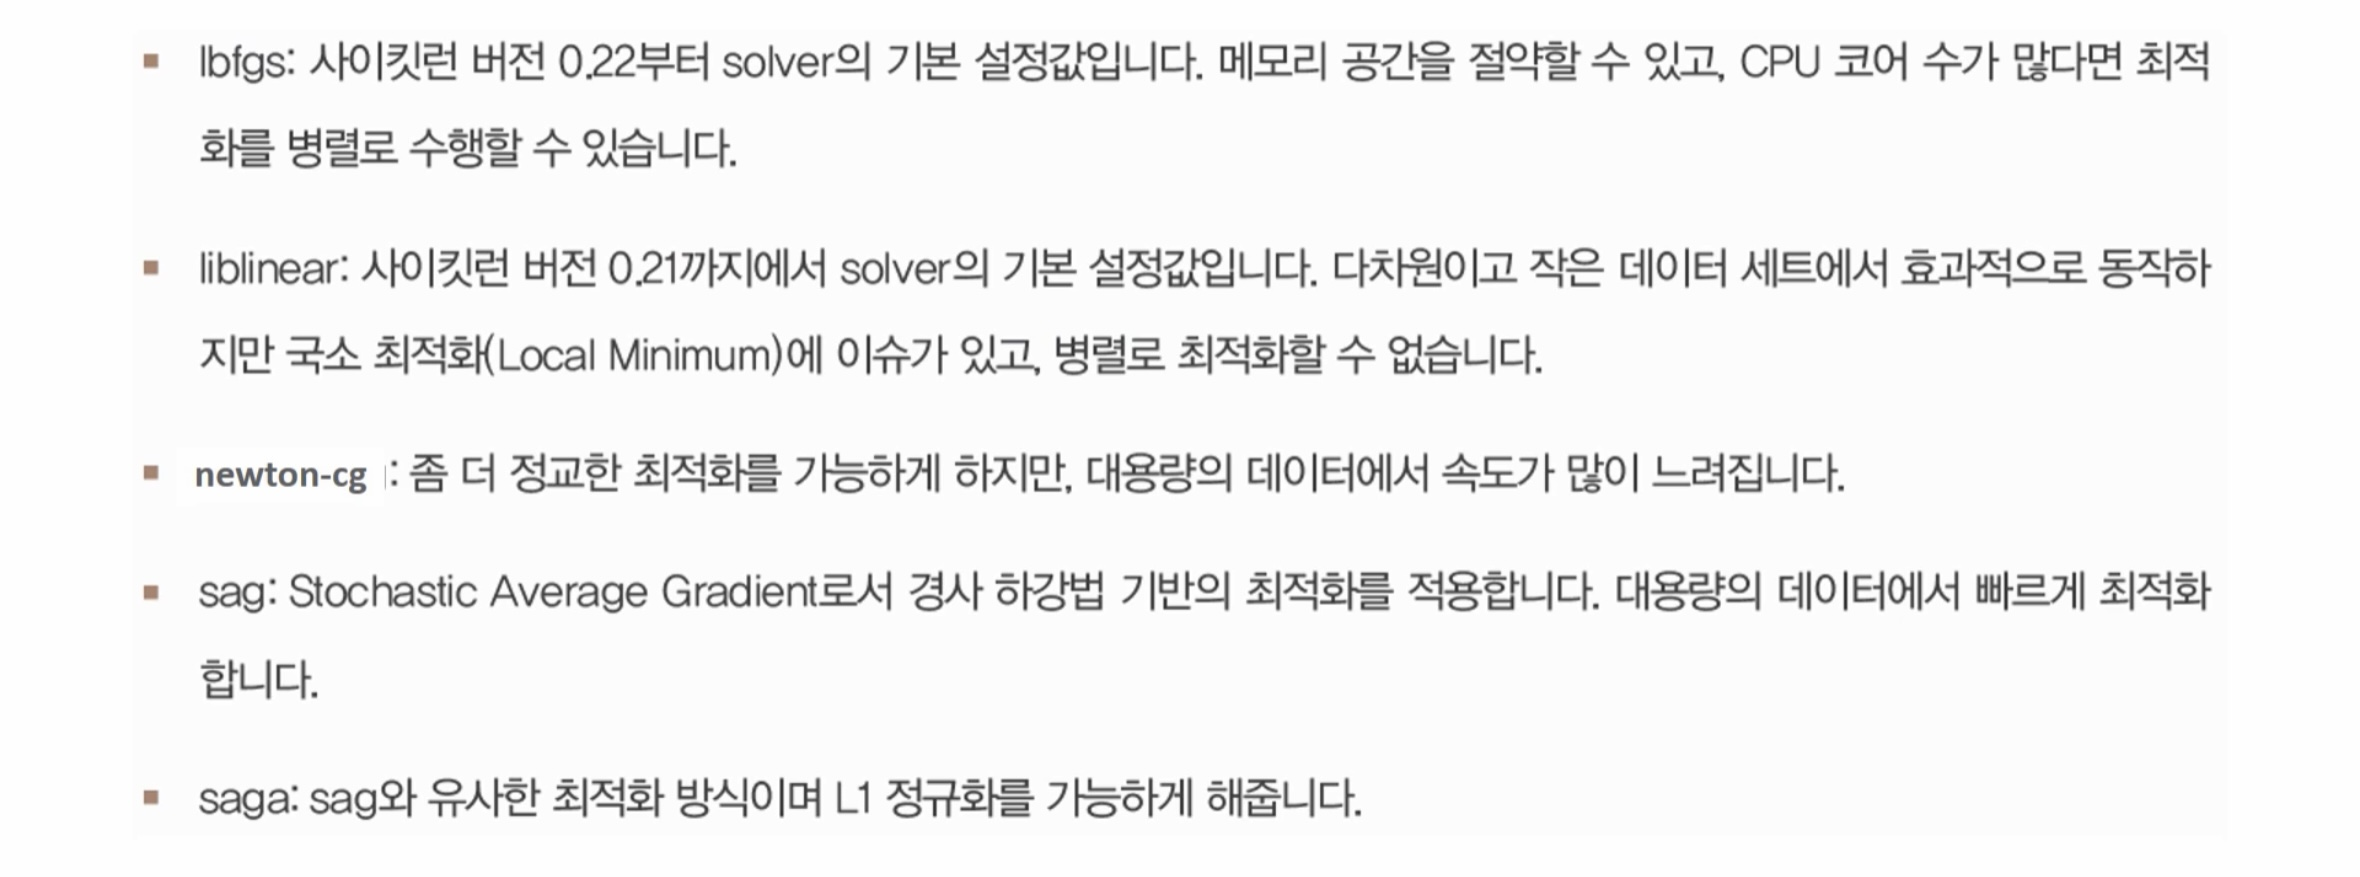

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression 

cancer = load_breast_cancer()

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [3]:
from sklearn.metrics import accuracy_score, roc_auc_score

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

print('accuracy: {0:.3f}, roc_auc:{1:.3f}'.format(accuracy_score(y_test, lr_preds),
                                                 roc_auc_score(y_test, lr_preds)))

accuracy: 0.977, roc_auc:0.972


In [5]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

for solver in solvers:
    lr_clf = LogisticRegression(solver = solver, max_iter = 600)
    lr_clf.fit(X_train, y_train)
    lr_preds = lr_clf.predict(X_test)
    
    print('solver:{0}, accuracy:{1:.3f}, roc_auc{2:3f}'.format(solver,
                                                              accuracy_score(y_test, lr_preds),
                                                              roc_auc_score(y_test, lr_preds))) 
          

solver:lbfgs, accuracy:0.977, roc_auc0.971561
solver:liblinear, accuracy:0.982, roc_auc0.979497
solver:newton-cg, accuracy:0.977, roc_auc0.971561
solver:sag, accuracy:0.982, roc_auc0.979497
solver:saga, accuracy:0.982, roc_auc0.979497


In [6]:
from sklearn.model_selection import GridSearchCV

params = {'solver':['liblinear', 'lbfg'],
         'penalty':['l2','l1'],
         'C': [0.01, 0.1, 1, 1, 5, 10]}

lr_clf = LogisticRegression()

grid_clf = GridSearchCV(lr_clf, param_grid = params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, 
                                                  grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, 최적 평균 정확도:0.979


/Users/isubin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
36 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/isubin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/isubin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/isubin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", l